In [1]:
pip install astropy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.4 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 35.9 MB/s eta 0:00:01
  Using cached pyerfa-2.0.1.1-cp39-abi3-macosx_11_0_arm64.whl (334 kB)
     |████████████████████████████████| 174 kB 51.8 MB/s eta 0:00:01
  Using cached astropy_iers_data-0.2024.1.22.0.30.30-py3-none-any.whl (1.9 MB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install astroquery

Defaulting to user installation because normal site-packages is not writeable
  Using cached astroquery-0.4.6-py3-none-any.whl (4.5 MB)
  Using cached keyring-24.3.0-py3-none-any.whl (38 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached pyvo-1.5-py3-none-any.whl (909 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached jaraco.classes-3.3.0-py3-none-any.whl (5.9 kB)
     |████████████████████████████████| 61 kB 489 kB/s eta 0:00:011
     |████████████████████████████████| 120 kB 4.6 MB/s eta 0:00:01
  Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
     |████████████████████████████████| 162 kB 18.2 MB/s eta 0:00:01
  Using cached more_itertools-10.2.0-py3-none-any.whl (57 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer

In [3]:
from astroquery.skyview import SkyView

/Users/arnoudb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
str(SkyView.list_surveys())

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

'None'

In [2]:
import astroquery

In [7]:
import json

In [11]:
SkyView.survey_dict

{'GammaRay': ['Fermi 5',
  'Fermi 4',
  'Fermi 3',
  'Fermi 2',
  'Fermi 1',
  'EGRET (3D)',
  'EGRET <100 MeV',
  'EGRET >100 MeV',
  'COMPTEL'],
 'HardX-ray': ['INT GAL 17-35 Flux',
  'INT GAL 17-60 Flux',
  'INT GAL 35-80 Flux',
  'INTEGRAL/SPI GC',
  'GRANAT/SIGMA',
  'RXTE Allsky 3-8keV Flux',
  'RXTE Allsky 3-20keV Flux',
  'RXTE Allsky 8-20keV Flux'],
 'X-ray:SwiftBAT': ['BAT SNR 14-195',
  'BAT SNR 14-20',
  'BAT SNR 20-24',
  'BAT SNR 24-35',
  'BAT SNR 35-50',
  'BAT SNR 50-75',
  'BAT SNR 75-100',
  'BAT SNR 100-150',
  'BAT SNR 150-195'],
 'SoftX-ray class=': ['SwiftXRTCnt',
  'SwiftXRTExp',
  'SwiftXRTInt',
  'HEAO 1 A-2'],
 'ROSATw/sources class=': ['RASS-Cnt Soft',
  'RASS-Cnt Hard',
  'RASS-Cnt Broad',
  'PSPC 2.0 Deg-Int',
  'PSPC 1.0 Deg-Int',
  'PSPC 0.6 Deg-Int',
  'HRI'],
 'ROSATDiffuse class=': ['RASS Background 1',
  'RASS Background 2',
  'RASS Background 3',
  'RASS Background 4',
  'RASS Background 5',
  'RASS Background 6',
  'RASS Background 7'],
 'UV': ['GA

In [14]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x116f04d60>

In [15]:
filename = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits'

# The spectrum is in the second HDU of this file.

with fits.open(filename) as f:  

    specdata = f[1].data 

In [18]:
from specutils import Spectrum1D
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

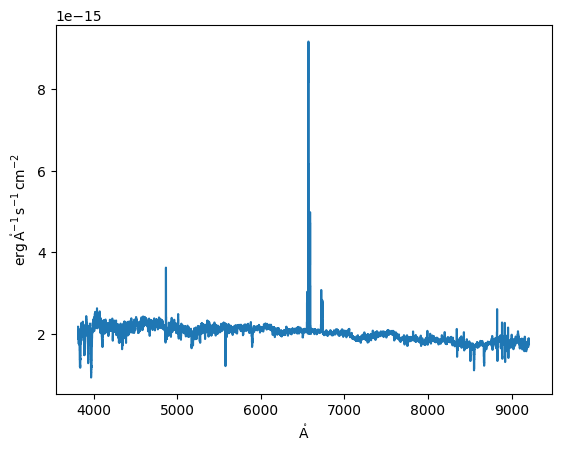

In [19]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 

In [20]:
specdata

FITS_rec([(218.22615, 3.5815, 0.01040728,  0,  0, 1.1466609 , 21.078829 , 206.55867),
          (215.54787, 3.5816, 0.01041321,  0,  0, 1.1462797 , 20.386013 , 203.6332 ),
          (210.0806 , 3.5817, 0.01067113,  0,  0, 1.1461256 , 19.335407 , 201.52524),
          ...,
          (188.33995, 3.9639, 0.04740239, 16, 16, 0.79463035,  6.832173 , 178.50255),
          (190.35242, 3.964 , 0.04717273, 16, 16, 0.7960782 ,  6.9811325, 178.51678),
          (175.59198, 3.9641, 0.05215673, 16, 16, 0.7963007 ,  7.3044147, 178.53107)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [21]:
specdata['flux']

array([218.22615, 215.54787, 210.0806 , ..., 188.33995, 190.35242,
       175.59198], dtype='>f4')

In [22]:
pip install spectral_cube

Defaulting to user installation because normal site-packages is not writeable
  Using cached spectral_cube-0.6.5-py3-none-any.whl (228 kB)
  Using cached dask-2024.1.0-py3-none-any.whl (1.2 MB)
  Using cached radio_beam-0.3.7-py3-none-any.whl (73 kB)
  Using cached casa_formats_io-0.2.2-cp38-abi3-macosx_11_0_arm64.whl (385 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
  Using cached partd-1.4.1-py3-none-any.whl (18 kB)
  Using cached fsspec-2023.12.2-py3-none-any.whl (168 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl (4.4 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
